In [1]:
#!conda install -c conda-forge wordcloud

In [2]:
import pandas as pd
import lxml.html
import requests

In [3]:
res = requests.get('https://terms.naver.com/entry.nhn?docId=5909015&cid=43667&categoryId=43667')

In [4]:
root = lxml.html.fromstring(res.text)

In [5]:
content = root.cssselect('[id = "content"]')[0].text_content()
content

'\n\t\t\n\t\t\tDataLab.\n\n\t\t\t\n                \n                    지식리스트\n                    수정문의\n                    공유\n                    인쇄\n                \n\n\t\t\t\n\t\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t    시사상식사전\n\t\t\t\t\n\t\t\t\t코로나바이러스감염증-19 확산 (2019~2020) \n\t\t\t\t\n                \n\t\t\t\t\n\t\t\t\n\n\n\t\t\t\n\t\t\t\t    \n                        요약\n\t\t\t\t\t\t2019년 12월 중국 후베이(湖北)성 우한(武漢)시에서 원인불명의 폐렴이 집단 발병하면서 시작된 사태이다. 이후 중국 전역은 물론 주변 아시아 국가와 북미 등으로 감염세가 확산되자\xa0세계보건기구(WHO)는 1월 30일 코로나19에 대해\xa0\'국제적 공중보건 비상사태\'(PHEIC)를 선포했다. 그러나 이후 전 대륙에서 확진자가 나온 것은 물론\xa0우리나라를 비롯해 이탈리아·이란 등에서 감염자가 속출한 것을 시작으로 유럽과 미국에서 확진자가 늘면서 WHO는\xa03월 11일 사상 세 번째로 팬데믹을 선포했다. 우리나라의 경우 2월 17일까지 확진자 수가 30명선으로 유지되며 안정세를 보였으나, 2월 18일부터 종교(신천지)와 거주지(대구·경북)가 연관된 지역감염 사례가 속출하면서 확진자가 기하급수적으로 늘었고, 이에 감염병 위기경보 단계가 \'심각\'으로 격상됐다.\n                    \n\n\t\t\t\t    \n\n\t\t\t\t\n\t\t\t\t\tvar currentPlayer;\n\t\t\t\t\tvar wT = document.title;\n\t\t\t\t\tfunction setCurrentPlayer(_id) {\n\t\t\

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [7]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[1, 3, 1, ..., 1, 1, 1]], dtype=int64)

In [8]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [9]:
df

,word,freq
0,04,1
1,0시,3
2,0시를,1
3,0시부터,1
4,0시부터는,2
...,...,...
1999,훨씬,1
2000,휴교령이나,1
2001,휴교를,1
2002,휴업한다,1


In [10]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
141,3월,35
1781,코로나19,34
108,2월,30
1609,중국,28
1977,확진자가,26
63,1월,24
312,감염병,23
49,19,20
157,4월,19
494,국내,17


In [11]:
from wordcloud import WordCloud

In [12]:
#wc = WordCloud(width=400, height=400, background_color='white')
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [13]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

In [14]:
wc.fit_words(frequencies)

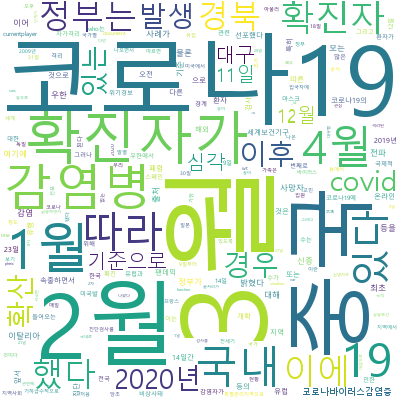

In [15]:
wc.to_image()